In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

#### Number of Instances

20640

#### Number of Attributes

8 numeric, predictive attributes and the target

#### Attribute Information:

Medinc: median income in block

HouseAge: median house age in block

AveRooms: average number of rooms

AveBedrms : average number of bedrooms

AveOccup: average house occupancy

Latitude: house block latitude

Longitudde: house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California distincts

In [4]:
print(housing_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing_data.data, housing_data.target, random_state=42) #access independent and dependent data 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

### Standardize data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test )

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [11]:
# import image module
from IPython.display import Image
# get the image
Image(url="functional_api.png", width=400, height=250)

### Build model architecture

In [15]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])


In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 30)                   930       ['dense_7[0][0]']             
                                                                                                  
 concatenate_2 (Concatenate  (None, 38)                   0         ['input_4[0][0]',             
 )                                                                   'dense_8[0][0]']         

In [17]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["mae"])

In [22]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=[X_valid, y_valid])

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3707 - mae: 0.4333 - val_loss: 0.3593 - val_mae: 0.4210
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3693 - mae: 0.4326 - val_loss: 0.5322 - val_mae: 0.4324
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3695 - mae: 0.4329 - val_loss: 0.3912 - val_mae: 0.4226
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3678 - mae: 0.4314 - val_loss: 0.3558 - val_mae: 0.4225
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3671 - mae: 0.4311 - val_loss: 0.3507 - val_mae: 0.4200
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - mae: 0.4306 - val_loss: 0.4385 - val_mae: 0.4241
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3659 - mae: 0.4296 - val_loss: 0.3481 - val_mae: 0.4188
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [23]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3425 - mae: 0.4122


In [24]:
model_history.history

{'loss': [0.3706859350204468,
  0.36925366520881653,
  0.3695021867752075,
  0.36782559752464294,
  0.36713504791259766,
  0.3657987713813782,
  0.3659031093120575,
  0.3646324574947357,
  0.36361584067344666,
  0.3629312813282013,
  0.3626379072666168,
  0.36147966980934143,
  0.3627627193927765,
  0.3601326048374176,
  0.35933366417884827,
  0.35897353291511536,
  0.3578163683414459,
  0.35810530185699463,
  0.35641807317733765,
  0.3560374081134796,
  0.3557874858379364,
  0.3545180857181549,
  0.3545662462711334,
  0.35385945439338684,
  0.3530721068382263,
  0.35250425338745117,
  0.3522074818611145,
  0.3515748381614685,
  0.3512926995754242,
  0.34996965527534485,
  0.35061052441596985,
  0.34880897402763367,
  0.34962475299835205,
  0.3482179343700409,
  0.34747225046157837,
  0.3474973440170288,
  0.3471912145614624,
  0.3464847207069397,
  0.3457275331020355,
  0.3452083468437195],
 'mae': [0.43331748247146606,
  0.43262743949890137,
  0.43287914991378784,
  0.431408047676086

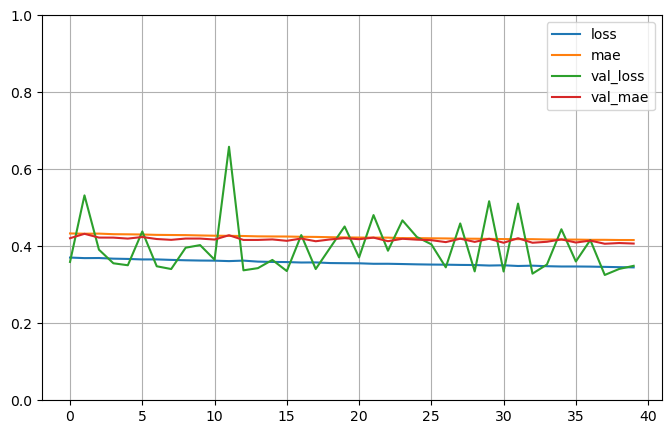

In [25]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [38]:
X_new = X_test[:3]

In [39]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 131ms/step
[[0.712149 ]
 [1.7432051]
 [4.036184 ]]
[0.477   0.458   5.00001]


#### Saving and Restoring

In [40]:
model.save("my_func_model.h5")

In [41]:
del model

In [42]:
model = keras.models.load_model("my_func_model.h5")

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 30)                   930       ['dense_7[0][0]']             
                                                                                                  
 concatenate_2 (Concatenate  (None, 38)                   0         ['input_4[0][0]',             
 )                                                                   'dense_8[0][0]']         

In [44]:
y_pred = model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 66ms/step
[[0.712149 ]
 [1.7432051]
 [4.036184 ]]
